In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from tqdm import tqdm

In [2]:
uploaded=files.upload()

Saving ADV.csv to ADV.csv


In [3]:
data=pd.read_csv(io.BytesIO(uploaded['ADV.csv']))

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
import statsmodels.formula.api as smf

In [10]:
lm =smf.ols(formula="Sales~TV",data=data).fit()

In [11]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [12]:
# Sales= 0.0475* TV + 7.0325
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        02:08:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))

In [14]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
data['Sales Pred']=sales_pred

In [16]:
data.head()

,TV,Radio,Newspaper,Sales,Sales Pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [18]:
import matplotlib.pyplot as plt


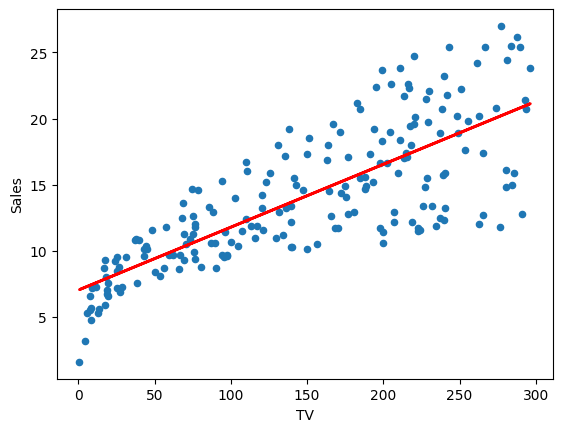

In [19]:
data.plot(kind="scatter", x="TV",y="Sales")
plt.plot(pd.DataFrame(data['TV']),sales_pred, c="red",linewidth=2)

In [20]:
lm2 =smf.ols(formula="Sales~TV+Newspaper",data=data).fit()

In [21]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [22]:
sales_pred2=lm2.predict(data[['TV','Newspaper']])

In [23]:
sales_pred2

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64